In [ ]:
import os
os.chdir('/content/drive/MyDrive/MS_ML')

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_banknote_authentication.csv',names =['col1','col2','col3','col4','target']  ,header=None)


"""
Variance of Wavelet Transformed image (continuous).
• Skewness of Wavelet Transformed image (continuous).
• Kurtosis of Wavelet Transformed image (continuous).
• Entropy of image (continuous).
• Class (0 for authentic, 1 for inauthentic)
"""

print(df)

         col1      col2     col3     col4  target
0     3.62160   8.66610  -2.8073 -0.44699       0
1     4.54590   8.16740  -2.4586 -1.46210       0
2     3.86600  -2.63830   1.9242  0.10645       0
3     3.45660   9.52280  -4.0112 -3.59440       0
4     0.32924  -4.45520   4.5718 -0.98880       0
...       ...       ...      ...      ...     ...
1367  0.40614   1.34920  -1.4501 -0.55949       1
1368 -1.38870  -4.87730   6.4774  0.34179       1
1369 -3.75030 -13.45860  17.5932 -2.77710       1
1370 -3.56370  -8.38270  12.3930 -1.28230       1
1371 -2.54190  -0.65804   2.6842  1.19520       1

[1372 rows x 5 columns]


In [ ]:
import numpy as np
 
class PCA:
  def __init__(self):
    self.num_components = None
    self.mean = None
    self.sorted_eigenvalue = None
    self.sorted_eigenvectors = None
  
  def fit(self,X , num_components = None):
    self.num_components = num_components
    self.mean = np.mean(X , axis = 0)

    X_meaned = X - self.mean
    cov_mat = np.cov(X_meaned , rowvar = False)

    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    self.sorted_eigenvalue = eigen_values[sorted_index]
    self.sorted_eigenvectors = eigen_vectors[:,sorted_index]
    if self.num_components:
      self.sorted_eigenvectors = self.sorted_eigenvectors[:,0:self.num_components]
    
  def transform(self, X):
    
    X_meaned = X - self.mean
    X_reduced = np.dot(self.sorted_eigenvectors.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced
  
  def fit_transform(self,X,num_components = None):
    self.fit(X,num_components = num_components)
    return self.transform(X)

In [ ]:
X = df.iloc[:,:-1] #selection features and droping last column
y = df.iloc[:,-1] # selection last columns as label/target
naive_bayes_predictor = PCA()
transformed_data = naive_bayes_predictor.fit_transform(X,num_components = 2)

In [ ]:
print(transformed_data.shape)

(1372, 2)


In [ ]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(transformed_data , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df ,df['target']] , axis = 1)
print(principal_df)

            PC1       PC2  target
0     -8.117954  2.372615       0
1     -7.800124  2.689555       0
2      3.690195  4.372720       0
3     -9.908612  0.978030       0
4      6.957545  0.733813       0
...         ...       ...     ...
1367  -1.005189  1.265160       1
1368   8.783021 -0.513829       1
1369  21.727432 -4.870114       1
1370  14.946310 -3.832314       1
1371   3.565247 -1.032120       1

[1372 rows x 3 columns]


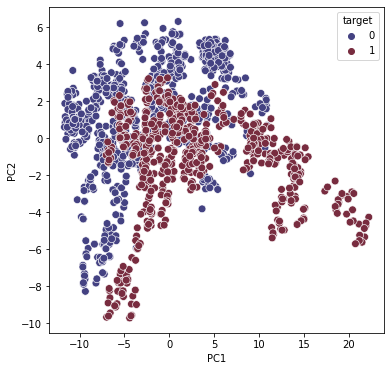

In [ ]:

import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')